In [1]:
#########################################################
## 1 - Consultations en ligne
########################################################
import os
cwd = os.getcwd()
print(cwd)

/Users/lingani


In [2]:
#importation des données de google spreadsheet
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

#fonction d'importation des données
def read_data(data_url, google_credentials):
    # use creds to create a client to interact with the Google Drive API
    scope = ['https://spreadsheets.google.com/feeds']
    creds = ServiceAccountCredentials.from_json_keyfile_name(google_credentials, scope)
    client = gspread.authorize(creds)
    # Find a workbook by name and open the first sheet
    # Make sure you use the right url here.
    sheet = client.open_by_url(data_url)
    worksheet = sheet.get_worksheet(0)
    # Extract and print all of the values
    list_of_hashes = worksheet.get_all_records()
    # print(list_of_hashes)
    return pd.DataFrame(list_of_hashes)

data_url = 'https://docs.google.com/spreadsheets/d/1TvjqPwKQJZhqT8TxD1iCO_-MvqeQ2eq3mECFQhfh6_c/edit?usp=sharing'
google_credentials = 'cocreation-f23bef2d618c.json'
propositions = read_data(data_url, google_credentials)
# propositions.head(5) # de-commentez cette ligne pour afficher les données et en avoir un apperçu

In [3]:
# Ici, nous allons faire quelques petites transformations pour plus de convenance
# propositions.columns # de-commentez cette ligne pour afficher les noms des colonnes
# Renommez les noms des colonnes pour des questions pratiques de manipulation des données
propositions.rename(columns={u"Dans quelle région residez-vous?": 'region', 
                   u'Domaines concernés par votre proposition': 'domaine',
                  u'Nom': 'nom',
                  u'Prénom': 'prenom',
                  u'E-mail': 'email',
                  u'Précisez la Ville ou la Province': 'province/ville',
                  u'Quel est votre proposition de solution': 'solution',
                  u'Quel problème souhaitez-vous résoudre?': 'probleme',
                  u'Sexe':'sexe',
                  u'Si vous avez sélectionner “Autre“ précédemment, précisé le pays dans lequel vous résidez': 'pays',
                  u"Souhaitez-vous être contacter par le comité du PGO afin d'approfondir la réflexion sur la solution que vous proposez? ": 'etre_contacte',
                  u'Timestamp': 'timestamp',
                  u"Tranche d'age": 'age',
                  u'Téléphone (WhatsApp)': u'phone(whatsApp)'}, inplace=True)

# propositions.columns # de-commentez cette ligne pour afficher les nouvaux noms des colonnes

In [4]:
# créons un corpus de texte pour les problèmes et les solutions
texte_problemes = "".join(propositions["probleme"])
texte_solutions = "".join(propositions["solution"])


In [5]:
# Nettoyons les deux corpus pour y soustraire les ponctuations et les mots de liaison
import nltk
def clean_tokens(texte):
    # transformons tous les textes en miniscule
    texte = texte.lower()
    tokens_texte = [t for t in texte.split()]
    # supprimer les ponctuations et les mots courts
    for w in tokens_texte:
        w = w.strip('\'"?,.!_+=-')
    for w in tokens_texte:
        if len(w) < 3:
            tokens_texte.remove(w) 
        
    # suppression des mots de liason
    from nltk.corpus import stopwords
    sr = stopwords.words('french')
    # trouver les stopwords français et le mettre dans sr
    french = pd.read_csv("french.csv")
    sr += list(french["words"])
    sr = list(set(sr))
    
    clean_tokens_texte = tokens_texte[:]
    for token in tokens_texte:
        if token in sr:
            clean_tokens_texte.remove(token)
    
    return clean_tokens_texte

cleaned_tokens_problemes = clean_tokens(texte_problemes)
cleaned_tokens_solutions = clean_tokens(texte_solutions)


/Users/lingani/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


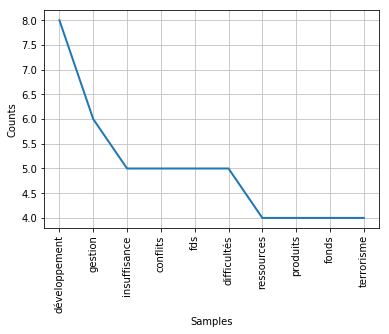

In [11]:
#cráetion du tableau de frequence des mots 
freq_problemes = nltk.FreqDist(cleaned_tokens_problemes)
freq_solutions = nltk.FreqDist(cleaned_tokens_solutions)
# d-commentez les deux ligne ci-dessous pour voir le tableau des frequences
# for key,val in freq.items():
#    print(key.encode('utf-8') + ':' + str(val))

# Afficher les graphques de frequence des mots pour les preocupations exprimées en régions
freq_problemes.plot(10, cumulative=False)

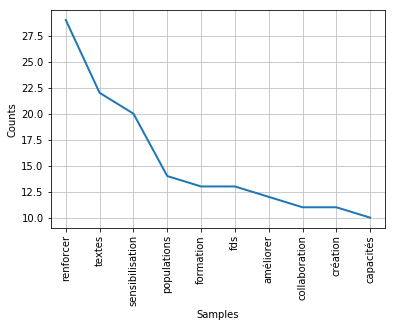

In [12]:
# Afficher les graphques de frequence des mots pour les propositions de solutions en régions
freq_solutions.plot(10, cumulative=False)

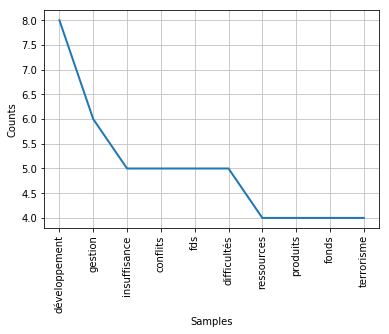

In [13]:
#########################################################
## 2 - Consultations regionales
########################################################
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

#importation des données de google spreadsheet
data_url = 'https://docs.google.com/spreadsheets/d/1x7FFFmqHeQwEmJx1iaP1zEX_Bh3AglVZZJG9pIwWusc/edit?usp=sharing'
google_credentials = 'cocreation-f23bef2d618c.json'
propositions = read_data(data_url, google_credentials)
# propositions.head(5) # de-commentez cette ligne pour afficher les données et en avoir un apperçu
# Vous pouvez aussi utiliser la ligne ci-dessous en ayant prealablement telecharger les données en format csv sur votre disque local
# propositions = pd.read_csv("consultations_regions.csv")

texte_problemes = "".join(propositions["probleme"])
texte_solutions = "".join(propositions["solution"])

texte_problemes = texte_problemes.replace('\xc3\xa0', '')
texte_solutions = texte_solutions.replace('renforcement', 'renforcer')
texte_solutions = texte_solutions.replace('Renforcement', 'renforcer')



cleaned_tokens_problemes = clean_tokens(texte_problemes)
cleaned_tokens_solutions = clean_tokens(texte_solutions)

#cráetion du tableau de frequence des mots 
freq_problemes = nltk.FreqDist(cleaned_tokens_problemes)
freq_solutions = nltk.FreqDist(cleaned_tokens_solutions)
# d-commentez les deux ligne ci-dessous pour voir le tableau des frequences
# for key,val in freq.items():
#    print(key.encode('utf-8') + ':' + str(val))

# Afficher les graphques de frequence des mots pour les preocupations exprimées en ligne
freq_problemes.plot(10, cumulative=False)

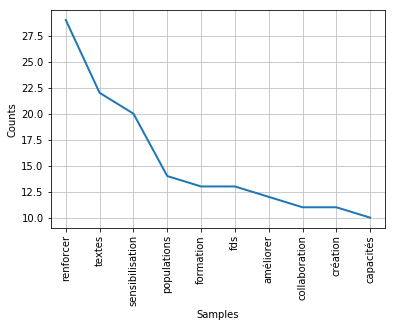

In [14]:
# Afficher les graphques de frequence des mots pour les propositions de solutions faites en ligne
freq_solutions.plot(10, cumulative=False)

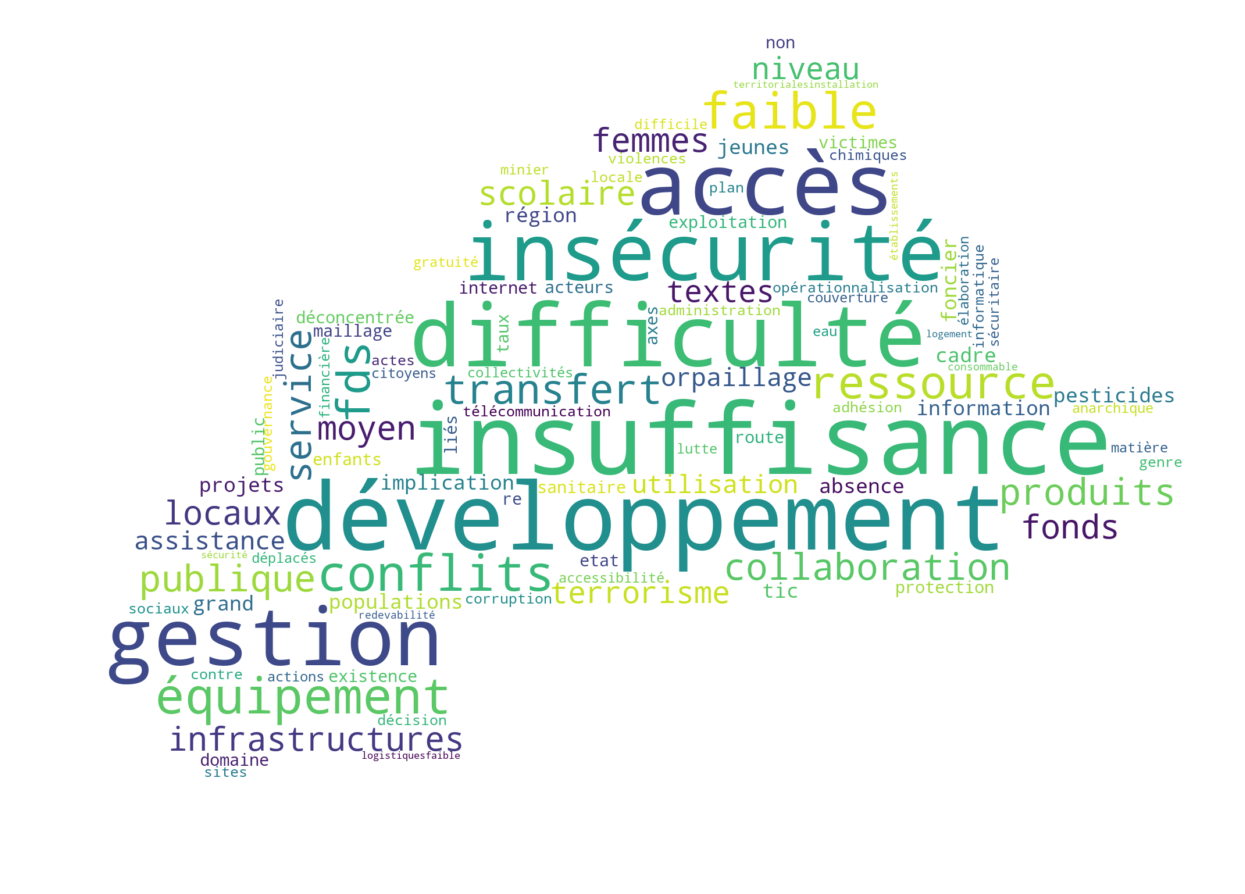

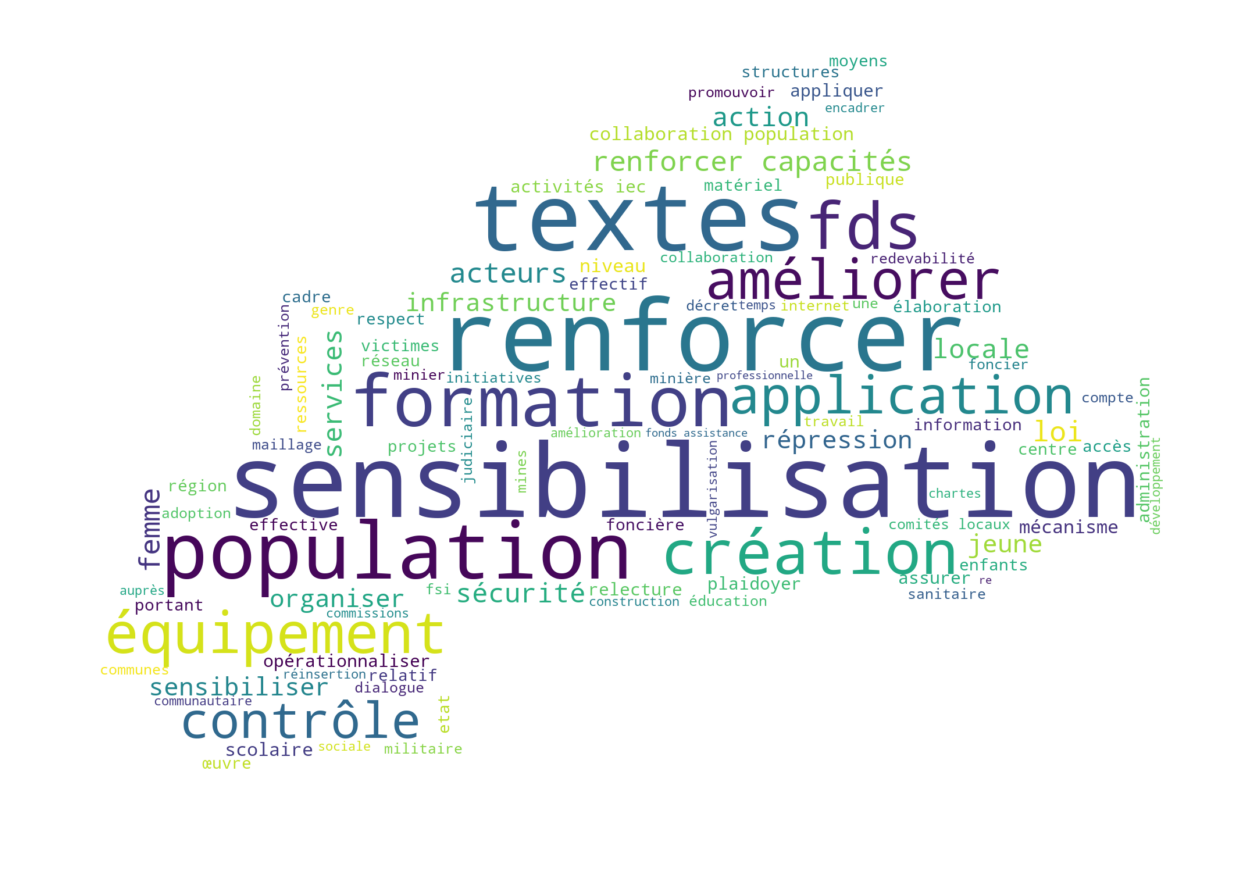

In [15]:
# Création de nuages de mots sur les consultations en régions
import os
import re
from PIL import Image
from os import path
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def makeImage(text):
    alice_mask = np.array(Image.open("bf9.jpg"))

    wc = WordCloud(background_color="white", max_words=100, mask=alice_mask)
    # generate word cloud
    wc.generate(text)

    # show
    plt.figure(figsize=(15,15), dpi=100)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
texte_problemes = " ".join(cleaned_tokens_problemes)
texte_solutions = " ".join(cleaned_tokens_solutions)

makeImage(texte_problemes.decode("utf-8"))
makeImage(texte_solutions.decode("utf-8"))